# Python Project - Team 5Py 

# (Ayushi Bhatnagar, Mona Sharma, Lavit Hingorani, Saket Sharan, Shobhit Gupta)

## Music Recommendation Project

### About the data set:

* MARD: Multimodal Album Reviews Dataset 

MARD contains texts and accompanying metadata originally obtained from a much larger dataset of Amazon customer reviews, which have been enriched with music metadata from MusicBrainz, and audio descriptors from AcousticBrainz. MARD amounts to a total of 65,566 albums and 263,525 customer reviews. The description of the contents of the text files are as follows:

**mard_metadata.json:**

In this file there is an entry per album. Depending on the album, the following fields may be available or not. The list of possible fields per entry: 

Source: Amazon 

amazon-id: The Amazon product id. You can visualize the album page in amazon adding this id to the following url "www.amazon.com/dp/" ||
artist: The artist name as it appears in Amazon ||
title: The album title as it appears in Amazon || 
related: 
    also bought: Other products bought by people who bought this album 
    buy_after_viewing: Other products bought by people after viewing this album ||
price: The album price ||
label: The record label of the album ||
categories: The genre categories in Amazon ||
sales_rank: Ranking in the Amazon music sales rank ||
imUrl: Url of the album cover ||
artist_url: The url of the artist page in amazon. You must add "www.amazon.com" at the beginning to access this page ||
root-genre: The root genre category of the album, extracted from the categories field.

Source: MusicBrainz 

artist-mbid: The MusicBrainz ID of the artist ||
first-release-year: The year of first publication of the album ||
release-group-mbid: The MusicBrainz ID of the release group mapped to this album title ||
release-group: The MusicBrainz ID of the first release in the release-group of this album, used to extract the tracks info ||
songs: List of tracks in the album 
    ftitle: Title of the track 
    fmbid: MusicBrainz recording ID of the track. Used to map with AcousticBrainz. 


** mard_reviews.json:**

The file containing the reviews text with some metadata associated to each review. Each entry has the following fields: reviewerID, amazon-id, reviewerName, helpful, reviewText, overall, summary, unixReviewTime, reviewTime. 


Source: http://mtg.upf.edu/download/datasets/mard

********************

**Loading the data into dataframes:**

We used MongoClient to convert the Json file into a csv file:

* import command:

mongoimport --db Music -c Metadata --mard_metadata.json

mongoimport --db Music -c Reviews --mard_reviews.json


* We got **metadata.csv and review.csv**:

We loaded the csv  into dataframes using pandas read_csv function

*****************

In [2]:
# need to import the numpy and pandas library
import numpy as np
import pandas as pd

In [3]:
col_names = ['_id','release_mbid', 'artist_mbid', 'imUrl','confidence','related','salesRank', 'categories','release_group_mbid','amazon_id','root_genre','title','artist','label','artist_url','first_release_year','songs','price']
df_metadata = pd.read_csv('~/Desktop/metadata.csv', delimiter = ','  , names = col_names, header = None )

df_metadata

/Users/ayushibhatnagar/Documents/Anaconda/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (4,15,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


_id  \
0                                     _id   
1      ObjectId(58b3624c54e8aa4aa94055a2)   
2      ObjectId(58b3624c54e8aa4aa94055a3)   
3      ObjectId(58b3624c54e8aa4aa94055a4)   
4      ObjectId(58b3624c54e8aa4aa94055a5)   
5      ObjectId(58b3624c54e8aa4aa94055a6)   
6      ObjectId(58b3624c54e8aa4aa94055a7)   
7      ObjectId(58b3624c54e8aa4aa94055a8)   
8      ObjectId(58b3624c54e8aa4aa94055a9)   
9      ObjectId(58b3624c54e8aa4aa94055aa)   
10     ObjectId(58b3624c54e8aa4aa94055ab)   
11     ObjectId(58b3624c54e8aa4aa94055ac)   
12     ObjectId(58b3624c54e8aa4aa94055ad)   
13     ObjectId(58b3624c54e8aa4aa94055ae)   
14     ObjectId(58b3624c54e8aa4aa94055af)   
15     ObjectId(58b3624c54e8aa4aa94055b0)   
16     ObjectId(58b3624c54e8aa4aa94055b1)   
17     ObjectId(58b3624c54e8aa4aa94055b2)   
18     ObjectId(58b3624c54e8aa4aa94055b3)   
19     ObjectId(58b3624c54e8aa4aa94055b4)   
20     ObjectId(58b3624c54e8aa4aa94055b5)   
21     ObjectId(58b3624c54e8aa4aa94055b6)   
22     ObjectId(58b3624c54e8aa4aa94055b7)   
23     ObjectId(58b3624c54e8aa4aa94055b8)   
24     ObjectId(58b3624c54e8aa4aa94055b9)   
25     ObjectId(58b3624c54e8aa4aa94055ba)   
26     ObjectId(58b3624c54e8aa4aa94055bb)   
27     ObjectId(58b3624c54e8aa4aa94055bc)   
28     ObjectId(58b3624c54e8aa4aa94055bd)   
29     ObjectId(58b3624c54e8aa4aa94055be)   
...                                   ...   
65537  ObjectId(58b3625654e8aa4aa94155a2)   
65538  ObjectId(58b3625654e8aa4aa94155a3)   
65539  ObjectId(58b3625654e8aa4aa94155a4)   
65540  ObjectId(58b3625654e8aa4aa94155a5)   
65541  ObjectId(58b3625654e8aa4aa94155a6)   
65542  ObjectId(58b3625654e8aa4aa94155a7)   
65543  ObjectId(58b3625654e8aa4aa94155a8)   
65544  ObjectId(58b3625654e8aa4aa94155a9)   
65545  ObjectId(58b3625654e8aa4aa94155aa)   
65546  ObjectId(58b3625654e8aa4aa94155ab)   
65547  ObjectId(58b3625654e8aa4aa94155ac)   
65548  ObjectId(58b3625654e8aa4aa94155ad)   
65549  ObjectId(58b3625654e8aa4aa94155ae)   
65550  ObjectId(58b3625654e8aa4aa94155af)   
65551  ObjectId(58b3625654e8aa4aa94155b0)   
65552  ObjectId(58b3625654e8aa4aa94155b1)   
65553  ObjectId(58b3625654e8aa4aa94155b2)   
65554  ObjectId(58b3625654e8aa4aa94155b3)   
65555  ObjectId(58b3625654e8aa4aa94155b4)   
65556  ObjectId(58b3625654e8aa4aa94155b5)   
65557  ObjectId(58b3625654e8aa4aa94155b6)   
65558  ObjectId(58b3625654e8aa4aa94155b7)   
65559  ObjectId(58b3625654e8aa4aa94155b8)   
65560  ObjectId(58b3625654e8aa4aa94155b9)   
65561  ObjectId(58b3625654e8aa4aa94155ba)   
65562  ObjectId(58b3625654e8aa4aa94155bb)   
65563  ObjectId(58b3625654e8aa4aa94155bc)   
65564  ObjectId(58b3625654e8aa4aa94155bd)   
65565  ObjectId(58b3625654e8aa4aa94155be)   
65566  ObjectId(58b3625654e8aa4aa94155bf)   

                               release_mbid  \
0                              release-mbid   
1                                       NaN   
2                                       NaN   
3      359b564b-3db4-44ad-9481-0b45f24aa53e   
4                                       NaN   
5      d22e418c-679d-42c0-991f-7ca12df854e8   
6      6ee7951d-b652-4005-8abf-fe8dabdacd4b   
7      5a717fed-9ba6-347c-93ad-59524c61ad31   
8      2bbfcc1d-d1a3-460c-bb45-ca1b2b48c8c4   
9      6800598b-1281-41e7-b824-656b17589be2   
10     03d1a782-fc49-43a7-a20e-bf397b70e1eb   
11     1e5aac10-d568-4fe0-85da-2d4ba8c3c8f0   
12     3e35db31-e369-494c-a574-66f3bbeaca2f   
13                                      NaN   
14     2f48b258-470f-3d35-9172-7d64bccb9eb3   
15     b241fa4f-9fb6-4d02-a0b3-984a0a6cf2c4   
16     e70b27cc-51a0-4802-be4b-5522be6f9d9e   
17     26b901b2-4cad-35d6-8ab5-ab8b3ae815f1   
18     2e55e758-724d-48e9-a712-85651d7c119e   
19     ebd5cebe-a9cd-3ec7-b885-b14181f1f9e2   
20     fbf0d4ea-40d8-4945-9e47-c0ba17dd896e   
21     ad4867ee-fd6c-48f1-891a-197f0f923a81   
22     0ab3bee1-f2f8-44a4-b75e-3a90b8a38ad5   
23     b52de724-b397-46df-a62f-926e2d82cb78   
24     ca0250ee-1a57-4c8c-b9a3-ac4c25b61a36   
25     9741a3bf-5867-432c

In [4]:
col_names =  ['_id','reviewerID', 'amazon_id', 'reviewerName','helpful', 'unixReviewTime', 'reviewText','overall','reviewTime','summary']
df_review = pd.read_csv('~/Desktop/review.csv', delimiter = ','  , names = col_names, header = None )

df_review

/Users/ayushibhatnagar/Documents/Anaconda/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


_id      reviewerID   amazon_id  \
0                                      _id      reviewerID   amazon-id   
1       ObjectId(58b362c054e8aa4aa94155c0)  A1BT6LQ9NY6RO3   615205399   
2       ObjectId(58b362c054e8aa4aa94155c1)  A206OKO2FE2IPL   615205399   
3       ObjectId(58b362c054e8aa4aa94155c2)  A1OFY4ATO7D13W    26197898   
4       ObjectId(58b362c054e8aa4aa94155c3)  A2KH83L1F70QR8    26197898   
5       ObjectId(58b362c054e8aa4aa94155c4)  A1KGXC7IRLVJR3   615205399   
6       ObjectId(58b362c054e8aa4aa94155c5)  A2VS3GBVNS30FP   615205399   
7       ObjectId(58b362c054e8aa4aa94155c6)  A1QWY3NX5E20NP   615205399   
8       ObjectId(58b362c054e8aa4aa94155c7)  A1X4QKQPWS2H09   615205399   
9       ObjectId(58b362c054e8aa4aa94155c8)  A1WFVI2N1Q63JK   739356046   
10      ObjectId(58b362c054e8aa4aa94155c9)   AHGNO0MV9QOGD   741301679   
11      ObjectId(58b362c054e8aa4aa94155ca)  A2YE8MDSL61KPP   692002855   
12      ObjectId(58b362c054e8aa4aa94155cb)  A250IAZJLKAOBL   792549597   
13      ObjectId(58b362c054e8aa4aa94155cc)   A3N6IHUA4QSHZ   792549597   
14      ObjectId(58b362c054e8aa4aa94155cd)  A2OIRDOBS7JNFR   876044798   
15      ObjectId(58b362c054e8aa4aa94155ce)  A3JSH529EHOQLO   792549597   
16      ObjectId(58b362c054e8aa4aa94155cf)  A3U1P9RN1MDV23   876124961   
17      ObjectId(58b362c054e8aa4aa94155d0)  A1TTGSJMC6TTS0   802381693   
18      ObjectId(58b362c054e8aa4aa94155d1)  A3LGQPJCZVL9UC   876124961   
19      ObjectId(58b362c054e8aa4aa94155d2)  A3LGQPJCZVL9UC   876125607   
20      ObjectId(58b362c054e8aa4aa94155d3)  A2HT588YK8C6VI   876125259   
21      ObjectId(58b362c054e8aa4aa94155d4)   AI830SKU0CSSC   792549597   
22      ObjectId(58b362c054e8aa4aa94155d5)  A3ODII68BBB5FN   898694833   
23      ObjectId(58b362c054e8aa4aa94155d6)  A3I2CXIX2DPUEI   898694833   
24      ObjectId(58b362c054e8aa4aa94155d7)  A2OP9QK9T5TH81   963619349   
25      ObjectId(58b362c054e8aa4aa94155d8)   A8PKRG906CSEV   963619349   
26      ObjectId(58b362c054e8aa4aa94155d9)  A1E2JT69I2DE1X   963619349   
27      ObjectId(58b362c054e8aa4aa94155da)  A305E9I232RAEY   898694833   
28      ObjectId(58b362c054e8aa4aa94155db)   AW0WFQDJLHOB5   963619349   
29      ObjectId(58b362c054e8aa4aa94155dc)  A2X7NBUETXC19E   963619349   
...                                    ...             ...         ...   
263496  ObjectId(58b362e054e8aa4aa9455b07)  A25SN3Y4UPKQNX  B00KYL7YFY   
263497  ObjectId(58b362e054e8aa4aa9455b08)  A11OP802VD1FK3  B00L1OCF3Y   
263498  ObjectId(58b362e054e8aa4aa9455b09)  A381F0LULQJL36  B00KZ1Q8WS   
263499  ObjectId(58b362e054e8aa4aa9455b0a)  A3F90CMQAL07F2  B00L1OCF3Y   
263500  ObjectId(58b362e054e8aa4aa9455b0b)  A1A8BO6QGVVDQY  B00L2NBSBY   
263501  ObjectId(58b362e054e8aa4aa9455b0c)   AST4PCDN0Q6UD  B00L2NBSBY   
263502  ObjectId(58b362e054e8aa4aa9455b0d)  A1ANRKHR4QWXJU  B00KYL7WTM   
263503  ObjectId(58b362e054e8aa4aa9455b0e)  A1G7SEWPF0NL1C  B00L4K6PRC   
263504  ObjectId(58b362e054e8aa4aa9455b0f)  A24FKMX322JMRB  B00L4K6PRC   
263505  ObjectId(58b362e054e8aa4aa9455b10)  A3M747X327CP7A  B00KWO74VC   
263506  ObjectId(58b362e054e8aa4aa9455b11)  A3QO0QOGMI0Z0U  B00L9HPNA0   
263507  ObjectId(58b362e054e8aa4aa9455b12)  A1UR9O5MOSSZVN  B00L9HPNA0   
263508  ObjectId(58b362e054e8aa4aa9455b13)   ASEBX8TBYWQWA  B00L5MGHLI   
263509  ObjectId(58b362e054e8aa4aa9455b14)  A2L7CGN3TPG1DA  B00LAI5H6S   
263510  ObjectId(58b362e054e8aa4aa9455b15)  A19QSJ8I8ZEQB5  B00LAI5H6S   
263511  ObjectId(58b362e054e8aa4aa9455b16)  A1CRPSJ0YA2PNW  B00L4K6PRC   
263512  ObjectId(58b362e054e8aa4aa9455b17)  A108RTL4X020LD  B00LEJS044   
263513  ObjectId(58b362e054e8aa4aa9455b18)  A2JCJ6RSF2GU5Z  B00LEJS044   
263514  ObjectId(58b362e054e8aa4aa9455b19)  A1I765FVPHXJD1  B00LAI5H6S   
263515  ObjectId(58b362e054e8aa4aa9455b1a)  A3JAVKH94T5NM1  B00LG9GR3S   
263516  ObjectId(58b362e054e8aa4aa9455b1b)  A3ME85ENCV5HHL  B00LG9GR3S   
263517  ObjectId(58b362e054e8aa4aa9455b1c)  A2PMBMJFGRK38B  B00LG9GR3S   
263518  ObjectId(58b362e054e8aa4aa9455b1d) 

** Cleaning the Data in the DataFrames:**

First, we got rid of the additional rows and columns that were not required for our analysis.(using drop function)

*****************

In [27]:
df_metadata_copy = df_metadata
df_metadata_copy = df_metadata_copy.drop([0])

df_review_copy = df_review
df_review_copy = df_review_copy.drop([0])

#df_metadata_copy
df_review_copy

_id      reviewerID   amazon_id  \
1       ObjectId(58b362c054e8aa4aa94155c0)  A1BT6LQ9NY6RO3   615205399   
2       ObjectId(58b362c054e8aa4aa94155c1)  A206OKO2FE2IPL   615205399   
3       ObjectId(58b362c054e8aa4aa94155c2)  A1OFY4ATO7D13W    26197898   
4       ObjectId(58b362c054e8aa4aa94155c3)  A2KH83L1F70QR8    26197898   
5       ObjectId(58b362c054e8aa4aa94155c4)  A1KGXC7IRLVJR3   615205399   
6       ObjectId(58b362c054e8aa4aa94155c5)  A2VS3GBVNS30FP   615205399   
7       ObjectId(58b362c054e8aa4aa94155c6)  A1QWY3NX5E20NP   615205399   
8       ObjectId(58b362c054e8aa4aa94155c7)  A1X4QKQPWS2H09   615205399   
9       ObjectId(58b362c054e8aa4aa94155c8)  A1WFVI2N1Q63JK   739356046   
10      ObjectId(58b362c054e8aa4aa94155c9)   AHGNO0MV9QOGD   741301679   
11      ObjectId(58b362c054e8aa4aa94155ca)  A2YE8MDSL61KPP   692002855   
12      ObjectId(58b362c054e8aa4aa94155cb)  A250IAZJLKAOBL   792549597   
13      ObjectId(58b362c054e8aa4aa94155cc)   A3N6IHUA4QSHZ   792549597   
14      ObjectId(58b362c054e8aa4aa94155cd)  A2OIRDOBS7JNFR   876044798   
15      ObjectId(58b362c054e8aa4aa94155ce)  A3JSH529EHOQLO   792549597   
16      ObjectId(58b362c054e8aa4aa94155cf)  A3U1P9RN1MDV23   876124961   
17      ObjectId(58b362c054e8aa4aa94155d0)  A1TTGSJMC6TTS0   802381693   
18      ObjectId(58b362c054e8aa4aa94155d1)  A3LGQPJCZVL9UC   876124961   
19      ObjectId(58b362c054e8aa4aa94155d2)  A3LGQPJCZVL9UC   876125607   
20      ObjectId(58b362c054e8aa4aa94155d3)  A2HT588YK8C6VI   876125259   
21      ObjectId(58b362c054e8aa4aa94155d4)   AI830SKU0CSSC   792549597   
22      ObjectId(58b362c054e8aa4aa94155d5)  A3ODII68BBB5FN   898694833   
23      ObjectId(58b362c054e8aa4aa94155d6)  A3I2CXIX2DPUEI   898694833   
24      ObjectId(58b362c054e8aa4aa94155d7)  A2OP9QK9T5TH81   963619349   
25      ObjectId(58b362c054e8aa4aa94155d8)   A8PKRG906CSEV   963619349   
26      ObjectId(58b362c054e8aa4aa94155d9)  A1E2JT69I2DE1X   963619349   
27      ObjectId(58b362c054e8aa4aa94155da)  A305E9I232RAEY   898694833   
28      ObjectId(58b362c054e8aa4aa94155db)   AW0WFQDJLHOB5   963619349   
29      ObjectId(58b362c054e8aa4aa94155dc)  A2X7NBUETXC19E   963619349   
30      ObjectId(58b362c054e8aa4aa94155dd)   AKB8MTVY5WC12   963619349   
...                                    ...             ...         ...   
263496  ObjectId(58b362e054e8aa4aa9455b07)  A25SN3Y4UPKQNX  B00KYL7YFY   
263497  ObjectId(58b362e054e8aa4aa9455b08)  A11OP802VD1FK3  B00L1OCF3Y   
263498  ObjectId(58b362e054e8aa4aa9455b09)  A381F0LULQJL36  B00KZ1Q8WS   
263499  ObjectId(58b362e054e8aa4aa9455b0a)  A3F90CMQAL07F2  B00L1OCF3Y   
263500  ObjectId(58b362e054e8aa4aa9455b0b)  A1A8BO6QGVVDQY  B00L2NBSBY   
263501  ObjectId(58b362e054e8aa4aa9455b0c)   AST4PCDN0Q6UD  B00L2NBSBY   
263502  ObjectId(58b362e054e8aa4aa9455b0d)  A1ANRKHR4QWXJU  B00KYL7WTM   
263503  ObjectId(58b362e054e8aa4aa9455b0e)  A1G7SEWPF0NL1C  B00L4K6PRC   
263504  ObjectId(58b362e054e8aa4aa9455b0f)  A24FKMX322JMRB  B00L4K6PRC   
263505  ObjectId(58b362e054e8aa4aa9455b10)  A3M747X327CP7A  B00KWO74VC   
263506  ObjectId(58b362e054e8aa4aa9455b11)  A3QO0QOGMI0Z0U  B00L9HPNA0   
263507  ObjectId(58b362e054e8aa4aa9455b12)  A1UR9O5MOSSZVN  B00L9HPNA0   
263508  ObjectId(58b362e054e8aa4aa9455b13)   ASEBX8TBYWQWA  B00L5MGHLI   
263509  ObjectId(58b362e054e8aa4aa9455b14)  A2L7CGN3TPG1DA  B00LAI5H6S   
263510  ObjectId(58b362e054e8aa4aa9455b15)  A19QSJ8I8ZEQB5  B00LAI5H6S   
263511  ObjectId(58b362e054e8aa4aa9455b16)  A1CRPSJ0YA2PNW  B00L4K6PRC   
263512  ObjectId(58b362e054e8aa4aa9455b17)  A108RTL4X020LD  B00LEJS044   
263513  ObjectId(58b362e054e8aa4aa9455b18)  A2JCJ6RSF2GU5Z  B00LEJS044   
263514  ObjectId(58b362e054e8aa4aa9455b19)  A1I765FVPHXJD1  B00LAI5H6S   
263515  ObjectId(58b362e054e8aa4aa9455b1a)  A3JAVKH94T5NM1  B00LG9GR3S   
263516  ObjectId(58b362e054e8aa4aa9455b1b)  A3ME85ENCV5HHL  B00LG9GR3S   
263517  ObjectId(58b362e054e8aa4aa9455b1c)  A2PMBMJFGRK38B  B00LG9GR3S   
263518  ObjectId(58b362e054e8aa4aa9455b1d) 

In [28]:
result = df_review_copy.merge(df_metadata_copy, on='amazon_id', how = 'left')
result

_id_x      reviewerID   amazon_id  \
0       ObjectId(58b362c054e8aa4aa94155c0)  A1BT6LQ9NY6RO3   615205399   
1       ObjectId(58b362c054e8aa4aa94155c1)  A206OKO2FE2IPL   615205399   
2       ObjectId(58b362c054e8aa4aa94155c2)  A1OFY4ATO7D13W    26197898   
3       ObjectId(58b362c054e8aa4aa94155c3)  A2KH83L1F70QR8    26197898   
4       ObjectId(58b362c054e8aa4aa94155c4)  A1KGXC7IRLVJR3   615205399   
5       ObjectId(58b362c054e8aa4aa94155c5)  A2VS3GBVNS30FP   615205399   
6       ObjectId(58b362c054e8aa4aa94155c6)  A1QWY3NX5E20NP   615205399   
7       ObjectId(58b362c054e8aa4aa94155c7)  A1X4QKQPWS2H09   615205399   
8       ObjectId(58b362c054e8aa4aa94155c8)  A1WFVI2N1Q63JK   739356046   
9       ObjectId(58b362c054e8aa4aa94155c9)   AHGNO0MV9QOGD   741301679   
10      ObjectId(58b362c054e8aa4aa94155ca)  A2YE8MDSL61KPP   692002855   
11      ObjectId(58b362c054e8aa4aa94155cb)  A250IAZJLKAOBL   792549597   
12      ObjectId(58b362c054e8aa4aa94155cc)   A3N6IHUA4QSHZ   792549597   
13      ObjectId(58b362c054e8aa4aa94155cd)  A2OIRDOBS7JNFR   876044798   
14      ObjectId(58b362c054e8aa4aa94155ce)  A3JSH529EHOQLO   792549597   
15      ObjectId(58b362c054e8aa4aa94155cf)  A3U1P9RN1MDV23   876124961   
16      ObjectId(58b362c054e8aa4aa94155d0)  A1TTGSJMC6TTS0   802381693   
17      ObjectId(58b362c054e8aa4aa94155d1)  A3LGQPJCZVL9UC   876124961   
18      ObjectId(58b362c054e8aa4aa94155d2)  A3LGQPJCZVL9UC   876125607   
19      ObjectId(58b362c054e8aa4aa94155d3)  A2HT588YK8C6VI   876125259   
20      ObjectId(58b362c054e8aa4aa94155d4)   AI830SKU0CSSC   792549597   
21      ObjectId(58b362c054e8aa4aa94155d5)  A3ODII68BBB5FN   898694833   
22      ObjectId(58b362c054e8aa4aa94155d6)  A3I2CXIX2DPUEI   898694833   
23      ObjectId(58b362c054e8aa4aa94155d7)  A2OP9QK9T5TH81   963619349   
24      ObjectId(58b362c054e8aa4aa94155d8)   A8PKRG906CSEV   963619349   
25      ObjectId(58b362c054e8aa4aa94155d9)  A1E2JT69I2DE1X   963619349   
26      ObjectId(58b362c054e8aa4aa94155da)  A305E9I232RAEY   898694833   
27      ObjectId(58b362c054e8aa4aa94155db)   AW0WFQDJLHOB5   963619349   
28      ObjectId(58b362c054e8aa4aa94155dc)  A2X7NBUETXC19E   963619349   
29      ObjectId(58b362c054e8aa4aa94155dd)   AKB8MTVY5WC12   963619349   
...                                    ...             ...         ...   
263495  ObjectId(58b362e054e8aa4aa9455b07)  A25SN3Y4UPKQNX  B00KYL7YFY   
263496  ObjectId(58b362e054e8aa4aa9455b08)  A11OP802VD1FK3  B00L1OCF3Y   
263497  ObjectId(58b362e054e8aa4aa9455b09)  A381F0LULQJL36  B00KZ1Q8WS   
263498  ObjectId(58b362e054e8aa4aa9455b0a)  A3F90CMQAL07F2  B00L1OCF3Y   
263499  ObjectId(58b362e054e8aa4aa9455b0b)  A1A8BO6QGVVDQY  B00L2NBSBY   
263500  ObjectId(58b362e054e8aa4aa9455b0c)   AST4PCDN0Q6UD  B00L2NBSBY   
263501  ObjectId(58b362e054e8aa4aa9455b0d)  A1ANRKHR4QWXJU  B00KYL7WTM   
263502  ObjectId(58b362e054e8aa4aa9455b0e)  A1G7SEWPF0NL1C  B00L4K6PRC   
263503  ObjectId(58b362e054e8aa4aa9455b0f)  A24FKMX322JMRB  B00L4K6PRC   
263504  ObjectId(58b362e054e8aa4aa9455b10)  A3M747X327CP7A  B00KWO74VC   
263505  ObjectId(58b362e054e8aa4aa9455b11)  A3QO0QOGMI0Z0U  B00L9HPNA0   
263506  ObjectId(58b362e054e8aa4aa9455b12)  A1UR9O5MOSSZVN  B00L9HPNA0   
263507  ObjectId(58b362e054e8aa4aa9455b13)   ASEBX8TBYWQWA  B00L5MGHLI   
263508  ObjectId(58b362e054e8aa4aa9455b14)  A2L7CGN3TPG1DA  B00LAI5H6S   
263509  ObjectId(58b362e054e8aa4aa9455b15)  A19QSJ8I8ZEQB5  B00LAI5H6S   
263510  ObjectId(58b362e054e8aa4aa9455b16)  A1CRPSJ0YA2PNW  B00L4K6PRC   
263511  ObjectId(58b362e054e8aa4aa9455b17)  A108RTL4X020LD  B00LEJS044   
263512  ObjectId(58b362e054e8aa4aa9455b18)  A2JCJ6RSF2GU5Z  B00LEJS044   
263513  ObjectId(58b362e054e8aa4aa9455b19)  A1I765FVPHXJD1  B00LAI5H6S   
263514  ObjectId(58b362e054e8aa4aa9455b1a)  A3JAVKH94T5NM1  B00LG9GR3S   
263515  ObjectId(58b362e054e8aa4aa9455b1b)  A3ME85ENCV5HHL  B00LG9GR3S   
263516  ObjectId(58b362e054e8aa4aa9455b1c)  A2PMBMJFGRK38B  B00LG9GR3S   
263517  ObjectId(58b362e054e8aa4aa9455b1d


Second, we removed any NaN value found in the result set using dropna function



In [32]:
cleanResult = result.dropna(how='any')

cleanResult

_id_x      reviewerID   amazon_id  \
195     ObjectId(58b362c054e8aa4aa9415683)  A2I91CUY72DWU1  1557252920   
1633    ObjectId(58b362c154e8aa4aa9415c21)  A2ZMSGTCOKKFEI  5557530584   
1634    ObjectId(58b362c154e8aa4aa9415c22)  A11RD5YOMUNFJ8  5557530584   
1635    ObjectId(58b362c154e8aa4aa9415c23)  A21AMFQK5SGWTC  5557530584   
1636    ObjectId(58b362c154e8aa4aa9415c24)  A343M1PHQI1QYL  5557530584   
1638    ObjectId(58b362c154e8aa4aa9415c26)  A2TUAPO0ZW58QP  5557530584   
1639    ObjectId(58b362c154e8aa4aa9415c27)  A2PBH7IXBD6FZ2  5557530584   
1640    ObjectId(58b362c154e8aa4aa9415c28)   AZSN1TO0JI87B  5557530584   
1641    ObjectId(58b362c154e8aa4aa9415c29)   AOM3ISY7XMDT3  5557530584   
1642    ObjectId(58b362c154e8aa4aa9415c2a)  A1OHD6GLHHKLKQ  5557530584   
1643    ObjectId(58b362c154e8aa4aa9415c2b)  A15FSFFG3JU5Q4  5557530584   
1644    ObjectId(58b362c154e8aa4aa9415c2c)  A13V4BPDOX33P6  5557530584   
1645    ObjectId(58b362c154e8aa4aa9415c2d)   AL18NM11D67PU  5557530584   
1646    ObjectId(58b362c154e8aa4aa9415c2e)  A3PZVWL03XYZSD  5557530584   
1647    ObjectId(58b362c154e8aa4aa9415c2f)  A10YTF4AWR5XCD  5557530584   
1648    ObjectId(58b362c154e8aa4aa9415c30)  A2T5OMQC5U49CT  5557530584   
1649    ObjectId(58b362c154e8aa4aa9415c31)  A2FVR3QG3IC6EY  5557530584   
1650    ObjectId(58b362c154e8aa4aa9415c32)   ADR61X8UU6TIE  5557530584   
1651    ObjectId(58b362c154e8aa4aa9415c33)  A13P8D1LNX86BP  5557530584   
1652    ObjectId(58b362c154e8aa4aa9415c34)  A2X8CUMZLROSE6  5557530584   
1653    ObjectId(58b362c154e8aa4aa9415c35)   AFVI6OICZFKYF  5557530584   
1654    ObjectId(58b362c154e8aa4aa9415c36)  A1N1PKA3TY228Q  5557530584   
1655    ObjectId(58b362c154e8aa4aa9415c37)  A26FSVC3LYU91Z  5557530584   
1656    ObjectId(58b362c154e8aa4aa9415c38)  A1UUNUP9317D3G  5557530584   
1657    ObjectId(58b362c154e8aa4aa9415c39)  A1CKTRLSHH427Y  5557530584   
1658    ObjectId(58b362c154e8aa4aa9415c3a)   ARGFUZIXYRWEV  5557530584   
1659    ObjectId(58b362c154e8aa4aa9415c3b)   ANCOMAI0I7LVG  5557530584   
1660    ObjectId(58b362c154e8aa4aa9415c3c)  A1734SMS3837AJ  5557530584   
1661    ObjectId(58b362c154e8aa4aa9415c3d)  A2P09FHKBD0F29  5557530584   
1662    ObjectId(58b362c154e8aa4aa9415c3e)  A157PQNU4NQPGJ  5557530584   
...                                    ...             ...         ...   
263447  ObjectId(58b362e054e8aa4aa9455ad7)  A21RF3DDGLD40Y  B00KNFJDSW   
263448  ObjectId(58b362e054e8aa4aa9455ad8)   ARELC3NVRIZ9E  B00KNFJDSW   
263449  ObjectId(58b362e054e8aa4aa9455ad9)  A2HU88I9MFMW9V  B00KNFJDSW   
263450  ObjectId(58b362e054e8aa4aa9455ada)   AAZZKOK1G3V78  B00KNFJDSW   
263451  ObjectId(58b362e054e8aa4aa9455adb)   AZ91JHMRYFC43  B00KNFJDSW   
263452  ObjectId(58b362e054e8aa4aa9455adc)  A127OBALBBSF26  B00KNFJDSW   
263453  ObjectId(58b362e054e8aa4aa9455add)  A3S7XKDD7ZTH9V  B00KNFJDSW   
263454  ObjectId(58b362e054e8aa4aa9455ade)   ALJRMR7C4Y5KT  B00KNFJDSW   
263455  ObjectId(58b362e054e8aa4aa9455adf)  A3B6ZREAJ3B95A  B00KNFJDSW   
263456  ObjectId(58b362e054e8aa4aa9455ae0)   AHMSCLJQ39RUE  B00KNFJDSW   
263457  ObjectId(58b362e054e8aa4aa9455ae1)  A13317QGY3RX6T  B00KNFJDSW   
263458  ObjectId(58b362e054e8aa4aa9455ae2)  A3L3YSJB9ZHXGD  B00KNFJDSW   
263459  ObjectId(58b362e054e8aa4aa9455ae3)  A31JTT31WQ22BT  B00KNFJDSW   
263460  ObjectId(58b362e054e8aa4aa9455ae4)  A3I9ZV2VD8B3QC  B00KNFJDSW   
263461  ObjectId(58b362e054e8aa4aa9455ae5)  A1YDZETSTJMTZ2  B00KNFJDSW   
263462  ObjectId(58b362e054e8aa4aa9455ae6)  A32SVOEN0GLBNI  B00KNFJDSW   
263463  ObjectId(58b362e054e8aa4aa9455ae7)   AT114GH1KQLGS  B00KNFJDSW   
263464  ObjectId(58b362e054e8aa4aa9455ae8)  A24N1BAS3CU27H  B00KNFJDSW   
263465  ObjectId(58b362e054e8aa4aa9455ae9)  A3IBD3R9FM54ZL  B00KNFJDSW   
263466  ObjectId(58b362e054e8aa4aa9455aea)  A1QP9LY9E2ZHNT  B00KNFJDSW   
263467  ObjectId(58b362e054e8aa4aa9455aeb)  A3U29LBT749HJ0  B00KNFJDSW   
263468  ObjectId(58b362e054e8aa4aa9455aec)   A94Z8RJBG47H6  B00KNFJDSW   
263469  ObjectId(58b362e054e8aa4aa9455aed

*********************
## Fact Discovery
********************

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt

In [34]:
cleanResult['firstRelease'] = 0
cleanResult['overal'] = 0
list = cleanResult[['first_release_year']].apply(pd.to_numeric)
cleanResult['firstRelease'] = list
list1 = cleanResult[['overall']].apply(pd.to_numeric)
cleanResult['overal'] = list1
cleanResult

/Users/ayushibhatnagar/Documents/Anaconda/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/ayushibhatnagar/Documents/Anaconda/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/ayushibhatnagar/Documents/Anaconda/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

_id_x      reviewerID   amazon_id  \
195     ObjectId(58b362c054e8aa4aa9415683)  A2I91CUY72DWU1  1557252920   
1633    ObjectId(58b362c154e8aa4aa9415c21)  A2ZMSGTCOKKFEI  5557530584   
1634    ObjectId(58b362c154e8aa4aa9415c22)  A11RD5YOMUNFJ8  5557530584   
1635    ObjectId(58b362c154e8aa4aa9415c23)  A21AMFQK5SGWTC  5557530584   
1636    ObjectId(58b362c154e8aa4aa9415c24)  A343M1PHQI1QYL  5557530584   
1638    ObjectId(58b362c154e8aa4aa9415c26)  A2TUAPO0ZW58QP  5557530584   
1639    ObjectId(58b362c154e8aa4aa9415c27)  A2PBH7IXBD6FZ2  5557530584   
1640    ObjectId(58b362c154e8aa4aa9415c28)   AZSN1TO0JI87B  5557530584   
1641    ObjectId(58b362c154e8aa4aa9415c29)   AOM3ISY7XMDT3  5557530584   
1642    ObjectId(58b362c154e8aa4aa9415c2a)  A1OHD6GLHHKLKQ  5557530584   
1643    ObjectId(58b362c154e8aa4aa9415c2b)  A15FSFFG3JU5Q4  5557530584   
1644    ObjectId(58b362c154e8aa4aa9415c2c)  A13V4BPDOX33P6  5557530584   
1645    ObjectId(58b362c154e8aa4aa9415c2d)   AL18NM11D67PU  5557530584   
1646    ObjectId(58b362c154e8aa4aa9415c2e)  A3PZVWL03XYZSD  5557530584   
1647    ObjectId(58b362c154e8aa4aa9415c2f)  A10YTF4AWR5XCD  5557530584   
1648    ObjectId(58b362c154e8aa4aa9415c30)  A2T5OMQC5U49CT  5557530584   
1649    ObjectId(58b362c154e8aa4aa9415c31)  A2FVR3QG3IC6EY  5557530584   
1650    ObjectId(58b362c154e8aa4aa9415c32)   ADR61X8UU6TIE  5557530584   
1651    ObjectId(58b362c154e8aa4aa9415c33)  A13P8D1LNX86BP  5557530584   
1652    ObjectId(58b362c154e8aa4aa9415c34)  A2X8CUMZLROSE6  5557530584   
1653    ObjectId(58b362c154e8aa4aa9415c35)   AFVI6OICZFKYF  5557530584   
1654    ObjectId(58b362c154e8aa4aa9415c36)  A1N1PKA3TY228Q  5557530584   
1655    ObjectId(58b362c154e8aa4aa9415c37)  A26FSVC3LYU91Z  5557530584   
1656    ObjectId(58b362c154e8aa4aa9415c38)  A1UUNUP9317D3G  5557530584   
1657    ObjectId(58b362c154e8aa4aa9415c39)  A1CKTRLSHH427Y  5557530584   
1658    ObjectId(58b362c154e8aa4aa9415c3a)   ARGFUZIXYRWEV  5557530584   
1659    ObjectId(58b362c154e8aa4aa9415c3b)   ANCOMAI0I7LVG  5557530584   
1660    ObjectId(58b362c154e8aa4aa9415c3c)  A1734SMS3837AJ  5557530584   
1661    ObjectId(58b362c154e8aa4aa9415c3d)  A2P09FHKBD0F29  5557530584   
1662    ObjectId(58b362c154e8aa4aa9415c3e)  A157PQNU4NQPGJ  5557530584   
...                                    ...             ...         ...   
263447  ObjectId(58b362e054e8aa4aa9455ad7)  A21RF3DDGLD40Y  B00KNFJDSW   
263448  ObjectId(58b362e054e8aa4aa9455ad8)   ARELC3NVRIZ9E  B00KNFJDSW   
263449  ObjectId(58b362e054e8aa4aa9455ad9)  A2HU88I9MFMW9V  B00KNFJDSW   
263450  ObjectId(58b362e054e8aa4aa9455ada)   AAZZKOK1G3V78  B00KNFJDSW   
263451  ObjectId(58b362e054e8aa4aa9455adb)   AZ91JHMRYFC43  B00KNFJDSW   
263452  ObjectId(58b362e054e8aa4aa9455adc)  A127OBALBBSF26  B00KNFJDSW   
263453  ObjectId(58b362e054e8aa4aa9455add)  A3S7XKDD7ZTH9V  B00KNFJDSW   
263454  ObjectId(58b362e054e8aa4aa9455ade)   ALJRMR7C4Y5KT  B00KNFJDSW   
263455  ObjectId(58b362e054e8aa4aa9455adf)  A3B6ZREAJ3B95A  B00KNFJDSW   
263456  ObjectId(58b362e054e8aa4aa9455ae0)   AHMSCLJQ39RUE  B00KNFJDSW   
263457  ObjectId(58b362e054e8aa4aa9455ae1)  A13317QGY3RX6T  B00KNFJDSW   
263458  ObjectId(58b362e054e8aa4aa9455ae2)  A3L3YSJB9ZHXGD  B00KNFJDSW   
263459  ObjectId(58b362e054e8aa4aa9455ae3)  A31JTT31WQ22BT  B00KNFJDSW   
263460  ObjectId(58b362e054e8aa4aa9455ae4)  A3I9ZV2VD8B3QC  B00KNFJDSW   
263461  ObjectId(58b362e054e8aa4aa9455ae5)  A1YDZETSTJMTZ2  B00KNFJDSW   
263462  ObjectId(58b362e054e8aa4aa9455ae6)  A32SVOEN0GLBNI  B00KNFJDSW   
263463  ObjectId(58b362e054e8aa4aa9455ae7)   AT114GH1KQLGS  B00KNFJDSW   
263464  ObjectId(58b362e054e8aa4aa9455ae8)  A24N1BAS3CU27H  B00KNFJDSW   
263465  ObjectId(58b362e054e8aa4aa9455ae9)  A3IBD3R9FM54ZL  B00KNFJDSW   
263466  ObjectId(58b362e054e8aa4aa9455aea)  A1QP9LY9E2ZHNT  B00KNFJDSW   
263467  ObjectId(58b362e054e8aa4aa9455aeb)  A3U29LBT749HJ0  B00KNFJDSW   
263468  ObjectId(58b362e054e8aa4aa9455aec)   A94Z8RJBG47H6  B00KNFJDSW   
263469  ObjectId(58b362e054e8aa4aa9455aed

In [13]:
resultsort1= pd.core.frame.DataFrame({'Count' : cleanResult.groupby('firstRelease').reviewerName.nunique()}).reset_index()
resultsort1



firstRelease  Count
0         1890.0     11
1         1912.0      1
2         1933.0      1
3         1936.0      1
4         1940.0      8
5         1944.0     16
6         1947.0      4
7         1948.0      3
8         1949.0     21
9         1950.0     15
10        1951.0      6
11        1952.0     20
12        1953.0     11
13        1954.0      3
14        1955.0      5
15        1956.0     44
16        1957.0     31
17        1958.0    262
18        1959.0    209
19        1960.0     45
20        1961.0     59
21        1962.0    117
22        1963.0    502
23        1964.0    628
24        1965.0   1139
25        1966.0    240
26        1967.0    790
27        1968.0    264
28        1969.0   1285
29        1970.0    577
..           ...    ...
45        1986.0    872
46        1987.0   1034
47        1988.0   1101
48        1989.0   1020
49        1990.0   1113
50        1991.0   1055
51        1992.0   1188
52        1993.0   1653
53        1994.0   1735
54        1995.0   1718
55        1996.0   2256
56        1997.0   2057
57        1998.0   1836
58        1999.0   3203
59        2000.0   3604
60        2001.0   4231
61        2002.0   3193
62        2003.0   4718
63        2004.0   4498
64        2005.0   4000
65        2006.0   3327
66        2007.0   3939
67        2008.0   4403
68        2009.0   5746
69        2010.0   5501
70        2011.0   3984
71        2012.0   6700
72        2013.0   7736
73        2014.0   2758
74        2015.0     26

[75 rows x 2 columns]

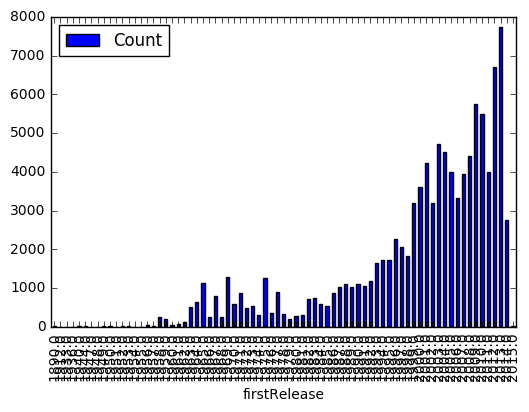

In [97]:
resultsort1.plot( x = 'firstRelease', y ='Count' , kind = 'bar' )

** Above plot shows the gradual increase in the reviews from 1890 to 2015 **

***********


***************

**Get genre, artist and release years seperately in Series to be used for fact discoveries:**

In [39]:
genre = cleanResult.groupby('root_genre').root_genre.nunique()
genre

root_genre
Alternative Rock      1
Blues                 1
Classical             1
Country               1
Dance & Electronic    1
Folk                  1
Gospel                1
Jazz                  1
Latin Music           1
Metal                 1
New Age               1
Pop                   1
R&B                   1
Rap & Hip-Hop         1
Reggae                1
Rock                  1
Name: root_genre, dtype: int64

In [16]:
artist = cleanResult.groupby('artist').artist.nunique()
artist.count()

6415

In [17]:
firstRelease = cleanResult.groupby('firstRelease').firstRelease.nunique()
firstRelease.count()

75

In [47]:
avgRating = cleanResult.groupby(['artist'])['overal'].mean()
avgRating = pd.DataFrame(avgRating)
grouped = avgRating.groupby(['overal']).groups
grouped

{1.0: ['Adam & The Ants',
  'Amandine Beyer',
  'Barney',
  'Ben Webster',
  'Billy Strayhorn',
  'Bob Kevoian',
  'Chubby Checker',
  'Courtney Barnett',
  'Dispatch',
  'Doobie Brothers',
  'E.O.N. Project',
  'El Gran Combo De Pue',
  'Enrique Iglesias',
  'Evelyn Vollmer',
  'Forté',
  'Franco Micalizzi',
  'Freddie & The Dreamers',
  'Global Stage Orchestra',
  'Jeff Martin',
  'Pro',
  'R.B. Greaves',
  'Searchers',
  'Shelter',
  'Smooth Jazz All Stars',
  'Snew',
  'Sunstorm & Joe Lynn Turner',
  'The Dwarves',
  'The Marshall Tucker Band',
  'Thomas De Hartmann',
  'Tina Turner',
  'Trini Lopez',
  'Vinnie Colaiuta',
  'Viola Wills',
  'Vogues',
  'Wolfgang Dauner'],
 1.5: ['Alicia Keys',
  'Precious Death',
  'Toots & The Maytals',
  'Walker Hezekiah'],
 1.6666666666666667: ['Aborted', 'Liquid Soul', 'Monna Bell'],
 1.75: ['W.a. Mozart'],
 1.8: ['Joshua James'],
 2.0: ['009 Sound System',
  'Aaron Neville',
  'Andrews Sisters',
  'Anton Karas',
  'B. B. King',
  'Carol Dougla

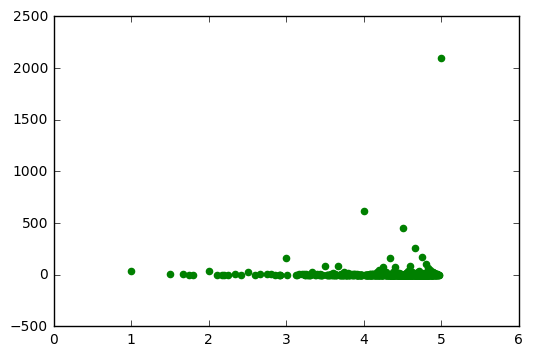

In [94]:
keys = grouped.keys()
values = grouped.values()

plt.scatter( [float(k) for k in keys],[ len(v) for v in values], color = 'g')

#avgRating.plot(kind = 'line')

** From the scatter plot we see maximum number of artists had 5.0 rating ( hence displaying how that information could affect our analysis) **
**********


********

#### Plotting the highest rated Genre:

In [20]:
avgGenre = cleanResult.groupby(['root_genre'])['overal'].mean()
avgGenre= pd.DataFrame(avgGenre)
avgGenre


overal
root_genre                  
Alternative Rock    4.456658
Blues               4.630872
Classical           4.514572
Country             4.650336
Dance & Electronic  4.436923
Folk                4.594954
Gospel              4.572581
Jazz                4.537946
Latin Music         4.556357
Metal               4.454840
New Age             4.545607
Pop                 4.452769
R&B                 4.502027
Rap & Hip-Hop       4.263098
Reggae              4.284289
Rock                4.404508

In [21]:
avgGenre.max()

overal    4.650336
dtype: float64

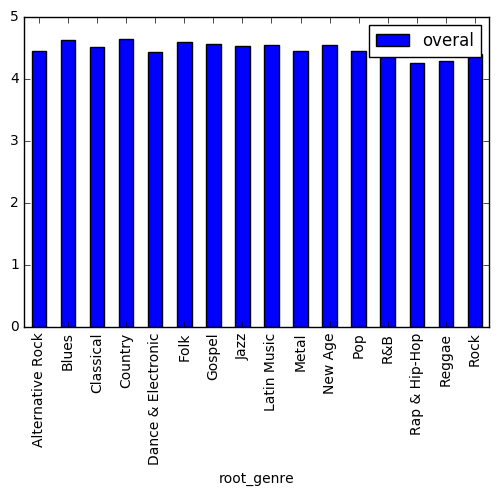

In [79]:
avgGenre.plot(kind = 'bar')

** Most popular genre in data collected from 1890 to 2015 is actually Blues (contradictory to popular belief - Rock)**

In [111]:
releasePop = cleanResult.groupby(['firstRelease','root_genre'])['overal'].mean()
releasePop



firstRelease  root_genre        
1890.0        Classical             3.272727
1912.0        Pop                   5.000000
1933.0        Jazz                  3.000000
1936.0        Jazz                  5.000000
1940.0        Classical             4.875000
1944.0        Classical             4.437500
1947.0        Pop                   5.000000
1948.0        Jazz                  4.333333
1949.0        Jazz                  4.333333
              Pop                   4.555556
1950.0        Jazz                  4.833333
              Pop                   2.000000
1951.0        Classical             4.500000
              Folk                  5.000000
              Pop                   4.000000
1952.0        Jazz                  4.000000
              Pop                   4.578947
1953.0        Classical             4.142857
              Jazz                  4.500000
1954.0        Jazz                  5.000000
1955.0        Classical             5.000000
              Folk    

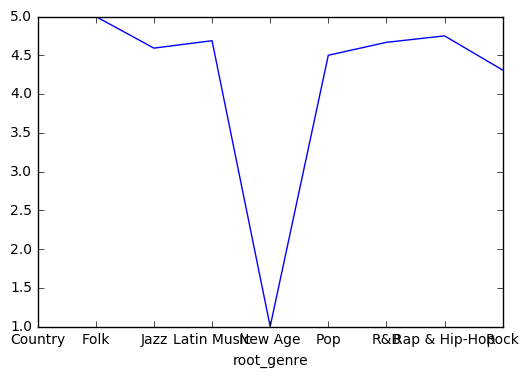

In [112]:
releasePop[1970].plot()

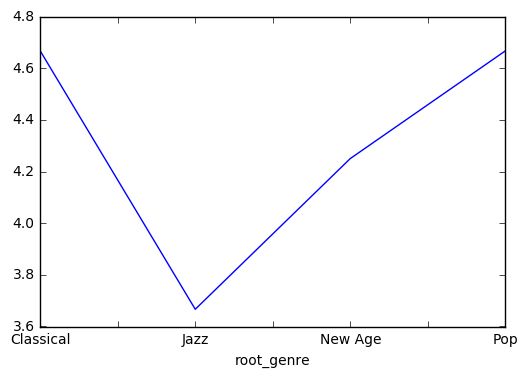

In [113]:
releasePop[2015].plot(kind = 'line')

**Rise and fall of Jazz (1970 - 2015)** 

In [24]:
artistPop = cleanResult.groupby(['firstRelease','artist'])['overal'].mean()

artistPop = pd.DataFrame(artistPop)
artistPop

overal
firstRelease artist                                                      
1890.0       Leonard Bernstein                                   3.272727
1912.0       Kingdom Heirs                                       5.000000
1933.0       Ethel Waters                                        3.000000
1936.0       Wild Bill Davis                                     5.000000
1940.0       Ludwig van Beethoven                                4.875000
1944.0       Piano Concertos From the Movies                     4.437500
1947.0       Alan Jay Lerner                                     5.000000
1948.0       Charlie Parker                                      4.333333
1949.0       Bunny Berigan & His Orchestra                       4.333333
             Cole Porter                                         4.555556
1950.0       Anton Karas                                         2.000000
             Dizzy Gillespie                                     4.833333
1951.0       Burton Lane                                         4.000000
             Oscar Brand                                         5.000000
             Richard Addinsell                                   4.500000
1952.0       Jackie Gleason                                      4.578947
             James Moody                                         4.000000
1953.0       Dave Brubeck Quartet                                4.500000
             George Lewis (Clarinet)                             4.500000
             Leonard Bernstein                                   4.500000
             Sigmund Romberg                                     3.666667
1954.0       Louis Armstrong                                     5.000000
             The Dave Brubeck Quartet                            5.000000
1955.0       Four Freshmen                                       5.000000
             Kenny Drew                                          5.000000
             Pete Seeger                                         5.000000
             Thelonious Monk                                     5.000000
             Tom Hazleton                                        5.000000
1956.0       Buddy Bregman                                       4.857143
             Duke Ellington                                      4.666667
...                                                                   ...
2014.0       Radney Foster                                       4.926829
             Ragan Whiteside                                     5.000000
             Relaxing Music Solo Piano                           3.666667
             Ricardo Arjona                                      4.684211
             Richard Marx                                        4.325000
             Roman Street                                        4.888889
             Romeo Santos                                        4.800000
             Rough Guide                                         4.000000
             Royal Bliss                                         5.000000
             Salsa Celtica                                       5.000000
             Shawn McDonald                                      4.800000
             Shostakovich                                        3.375000
             Sumerlin                                            5.000000
             Techung                                             5.000000
             The Dudes of Wrath                                  4.538462
             The Immediate                                       5.000000
             Ultimate Collection Driving Songs                   2.500000
             Various                                             5.000000
             Various Artists                                     4.844444
             Victor Young                                        4.000000
             Wussy                                               4.800000
             Yoshiki Aoi                                         5.0000

*****************
## Sentiment Analysis

#### We make a copy of the result dataframe and run analysis on it

In [95]:
result_copy = result
result_copy

_id_x      reviewerID   amazon_id  \
0       ObjectId(58b362c054e8aa4aa94155c0)  A1BT6LQ9NY6RO3   615205399   
1       ObjectId(58b362c054e8aa4aa94155c1)  A206OKO2FE2IPL   615205399   
2       ObjectId(58b362c054e8aa4aa94155c2)  A1OFY4ATO7D13W    26197898   
3       ObjectId(58b362c054e8aa4aa94155c3)  A2KH83L1F70QR8    26197898   
4       ObjectId(58b362c054e8aa4aa94155c4)  A1KGXC7IRLVJR3   615205399   
5       ObjectId(58b362c054e8aa4aa94155c5)  A2VS3GBVNS30FP   615205399   
6       ObjectId(58b362c054e8aa4aa94155c6)  A1QWY3NX5E20NP   615205399   
7       ObjectId(58b362c054e8aa4aa94155c7)  A1X4QKQPWS2H09   615205399   
8       ObjectId(58b362c054e8aa4aa94155c8)  A1WFVI2N1Q63JK   739356046   
9       ObjectId(58b362c054e8aa4aa94155c9)   AHGNO0MV9QOGD   741301679   
10      ObjectId(58b362c054e8aa4aa94155ca)  A2YE8MDSL61KPP   692002855   
11      ObjectId(58b362c054e8aa4aa94155cb)  A250IAZJLKAOBL   792549597   
12      ObjectId(58b362c054e8aa4aa94155cc)   A3N6IHUA4QSHZ   792549597   
13      ObjectId(58b362c054e8aa4aa94155cd)  A2OIRDOBS7JNFR   876044798   
14      ObjectId(58b362c054e8aa4aa94155ce)  A3JSH529EHOQLO   792549597   
15      ObjectId(58b362c054e8aa4aa94155cf)  A3U1P9RN1MDV23   876124961   
16      ObjectId(58b362c054e8aa4aa94155d0)  A1TTGSJMC6TTS0   802381693   
17      ObjectId(58b362c054e8aa4aa94155d1)  A3LGQPJCZVL9UC   876124961   
18      ObjectId(58b362c054e8aa4aa94155d2)  A3LGQPJCZVL9UC   876125607   
19      ObjectId(58b362c054e8aa4aa94155d3)  A2HT588YK8C6VI   876125259   
20      ObjectId(58b362c054e8aa4aa94155d4)   AI830SKU0CSSC   792549597   
21      ObjectId(58b362c054e8aa4aa94155d5)  A3ODII68BBB5FN   898694833   
22      ObjectId(58b362c054e8aa4aa94155d6)  A3I2CXIX2DPUEI   898694833   
23      ObjectId(58b362c054e8aa4aa94155d7)  A2OP9QK9T5TH81   963619349   
24      ObjectId(58b362c054e8aa4aa94155d8)   A8PKRG906CSEV   963619349   
25      ObjectId(58b362c054e8aa4aa94155d9)  A1E2JT69I2DE1X   963619349   
26      ObjectId(58b362c054e8aa4aa94155da)  A305E9I232RAEY   898694833   
27      ObjectId(58b362c054e8aa4aa94155db)   AW0WFQDJLHOB5   963619349   
28      ObjectId(58b362c054e8aa4aa94155dc)  A2X7NBUETXC19E   963619349   
29      ObjectId(58b362c054e8aa4aa94155dd)   AKB8MTVY5WC12   963619349   
...                                    ...             ...         ...   
263495  ObjectId(58b362e054e8aa4aa9455b07)  A25SN3Y4UPKQNX  B00KYL7YFY   
263496  ObjectId(58b362e054e8aa4aa9455b08)  A11OP802VD1FK3  B00L1OCF3Y   
263497  ObjectId(58b362e054e8aa4aa9455b09)  A381F0LULQJL36  B00KZ1Q8WS   
263498  ObjectId(58b362e054e8aa4aa9455b0a)  A3F90CMQAL07F2  B00L1OCF3Y   
263499  ObjectId(58b362e054e8aa4aa9455b0b)  A1A8BO6QGVVDQY  B00L2NBSBY   
263500  ObjectId(58b362e054e8aa4aa9455b0c)   AST4PCDN0Q6UD  B00L2NBSBY   
263501  ObjectId(58b362e054e8aa4aa9455b0d)  A1ANRKHR4QWXJU  B00KYL7WTM   
263502  ObjectId(58b362e054e8aa4aa9455b0e)  A1G7SEWPF0NL1C  B00L4K6PRC   
263503  ObjectId(58b362e054e8aa4aa9455b0f)  A24FKMX322JMRB  B00L4K6PRC   
263504  ObjectId(58b362e054e8aa4aa9455b10)  A3M747X327CP7A  B00KWO74VC   
263505  ObjectId(58b362e054e8aa4aa9455b11)  A3QO0QOGMI0Z0U  B00L9HPNA0   
263506  ObjectId(58b362e054e8aa4aa9455b12)  A1UR9O5MOSSZVN  B00L9HPNA0   
263507  ObjectId(58b362e054e8aa4aa9455b13)   ASEBX8TBYWQWA  B00L5MGHLI   
263508  ObjectId(58b362e054e8aa4aa9455b14)  A2L7CGN3TPG1DA  B00LAI5H6S   
263509  ObjectId(58b362e054e8aa4aa9455b15)  A19QSJ8I8ZEQB5  B00LAI5H6S   
263510  ObjectId(58b362e054e8aa4aa9455b16)  A1CRPSJ0YA2PNW  B00L4K6PRC   
263511  ObjectId(58b362e054e8aa4aa9455b17)  A108RTL4X020LD  B00LEJS044   
263512  ObjectId(58b362e054e8aa4aa9455b18)  A2JCJ6RSF2GU5Z  B00LEJS044   
263513  ObjectId(58b362e054e8aa4aa9455b19)  A1I765FVPHXJD1  B00LAI5H6S   
263514  ObjectId(58b362e054e8aa4aa9455b1a)  A3JAVKH94T5NM1  B00LG9GR3S   
263515  ObjectId(58b362e054e8aa4aa9455b1b)  A3ME85ENCV5HHL  B00LG9GR3S   
263516  ObjectId(58b362e054e8aa4aa9455b1c)  A2PMBMJFGRK38B  B00LG9GR3S   
263517  ObjectId(58b362e054e8aa4aa9455b1d

In [81]:
import pandas as pd
import csv
# Import NTLK package 
from nltk import sent_tokenize,word_tokenize

Load positive and negative words from predefined dictionary 
 * general_inquirer.txt - Source: http://www.wjh.harvard.edu/~inquirer/

In [82]:

positive=[]
negative=[]
keys_to_ignore = ['Entry','Source','Defined']


In [83]:
fin = open('/Users/ayushibhatnagar/Desktop/general_inquirer_dict.txt', 'r')
with fin:
    reader = csv.DictReader(fin,delimiter='\t')
    for i,line in enumerate(reader):
        if line['Negativ']=='Negativ':
            if line['Entry'].find('#')==-1:
                negative.append(line['Entry'].lower())
            if line['Entry'].find('#')!=-1: #In General Inquirer, some words have multiple senses. Combine all tags for all senses.
                negative.append(line['Entry'].lower()[:line['Entry'].index('#')]) 
        if line['Positiv']=='Positiv':
            if line['Entry'].find('#')==-1:
                positive.append(line['Entry'].lower())
            if line['Entry'].find('#')!=-1: #In General Inquirer, some words have multiple senses. Combine all tags for all senses.
                positive.append(line['Entry'].lower()[:line['Entry'].index('#')])
                

fin.close()

In [90]:
# Store positive words and negative words from the dictionary in two lists
pvocabulary=sorted(list(set(positive))) 
nvocabulary=sorted(list(set(negative))) 

# See data columns
result_copy['poswdcnt']=0
result_copy['negwdcnt']=0
result_copy['lsentiment']=0
result_copy_index=0
# Tokenize the words from the review documents to a word list
def getWordList(text,word_proc=lambda x:x):
    word_list=[]
    for sent in sent_tokenize(text):
        for word in word_tokenize(sent):
            word_list.append(word)
    return word_list



In [ ]:
pcount_list=[]
ncount_list=[]
lsenti_list=[]
# Iterate all review documents
# For each word, look it up in the positive word list and the negative word list
# If found in any list, update the corresponding counts 
for text in str(result_copy['reviewText']):
    vocabulary=getWordList(text,lambda x:x.lower())
    pcount=0
    ncount=0
    for pword in pvocabulary:
        pcount += vocabulary.count(pword)
    for nword in nvocabulary:
        ncount += vocabulary.count(nword)
    
    pcount_list.append(pcount)
    ncount_list.append(ncount)
    lsenti_list.append(pcount-ncount)
    
    
    result_copy_index += 1

In [91]:
result_copy

_id_x      reviewerID   amazon-id  \
0       ObjectId(58b362c054e8aa4aa94155c0)  A1BT6LQ9NY6RO3   615205399   
1       ObjectId(58b362c054e8aa4aa94155c1)  A206OKO2FE2IPL   615205399   
2       ObjectId(58b362c054e8aa4aa94155c2)  A1OFY4ATO7D13W    26197898   
3       ObjectId(58b362c054e8aa4aa94155c3)  A2KH83L1F70QR8    26197898   
4       ObjectId(58b362c054e8aa4aa94155c4)  A1KGXC7IRLVJR3   615205399   
5       ObjectId(58b362c054e8aa4aa94155c5)  A2VS3GBVNS30FP   615205399   
6       ObjectId(58b362c054e8aa4aa94155c6)  A1QWY3NX5E20NP   615205399   
7       ObjectId(58b362c054e8aa4aa94155c7)  A1X4QKQPWS2H09   615205399   
8       ObjectId(58b362c054e8aa4aa94155c8)  A1WFVI2N1Q63JK   739356046   
9       ObjectId(58b362c054e8aa4aa94155c9)   AHGNO0MV9QOGD   741301679   
10      ObjectId(58b362c054e8aa4aa94155ca)  A2YE8MDSL61KPP   692002855   
11      ObjectId(58b362c054e8aa4aa94155cb)  A250IAZJLKAOBL   792549597   
12      ObjectId(58b362c054e8aa4aa94155cc)   A3N6IHUA4QSHZ   792549597   
13      ObjectId(58b362c054e8aa4aa94155cd)  A2OIRDOBS7JNFR   876044798   
14      ObjectId(58b362c054e8aa4aa94155ce)  A3JSH529EHOQLO   792549597   
15      ObjectId(58b362c054e8aa4aa94155cf)  A3U1P9RN1MDV23   876124961   
16      ObjectId(58b362c054e8aa4aa94155d0)  A1TTGSJMC6TTS0   802381693   
17      ObjectId(58b362c054e8aa4aa94155d1)  A3LGQPJCZVL9UC   876124961   
18      ObjectId(58b362c054e8aa4aa94155d2)  A3LGQPJCZVL9UC   876125607   
19      ObjectId(58b362c054e8aa4aa94155d3)  A2HT588YK8C6VI   876125259   
20      ObjectId(58b362c054e8aa4aa94155d4)   AI830SKU0CSSC   792549597   
21      ObjectId(58b362c054e8aa4aa94155d5)  A3ODII68BBB5FN   898694833   
22      ObjectId(58b362c054e8aa4aa94155d6)  A3I2CXIX2DPUEI   898694833   
23      ObjectId(58b362c054e8aa4aa94155d7)  A2OP9QK9T5TH81   963619349   
24      ObjectId(58b362c054e8aa4aa94155d8)   A8PKRG906CSEV   963619349   
25      ObjectId(58b362c054e8aa4aa94155d9)  A1E2JT69I2DE1X   963619349   
26      ObjectId(58b362c054e8aa4aa94155da)  A305E9I232RAEY   898694833   
27      ObjectId(58b362c054e8aa4aa94155db)   AW0WFQDJLHOB5   963619349   
28      ObjectId(58b362c054e8aa4aa94155dc)  A2X7NBUETXC19E   963619349   
29      ObjectId(58b362c054e8aa4aa94155dd)   AKB8MTVY5WC12   963619349   
...                                    ...             ...         ...   
263495  ObjectId(58b362e054e8aa4aa9455b07)  A25SN3Y4UPKQNX  B00KYL7YFY   
263496  ObjectId(58b362e054e8aa4aa9455b08)  A11OP802VD1FK3  B00L1OCF3Y   
263497  ObjectId(58b362e054e8aa4aa9455b09)  A381F0LULQJL36  B00KZ1Q8WS   
263498  ObjectId(58b362e054e8aa4aa9455b0a)  A3F90CMQAL07F2  B00L1OCF3Y   
263499  ObjectId(58b362e054e8aa4aa9455b0b)  A1A8BO6QGVVDQY  B00L2NBSBY   
263500  ObjectId(58b362e054e8aa4aa9455b0c)   AST4PCDN0Q6UD  B00L2NBSBY   
263501  ObjectId(58b362e054e8aa4aa9455b0d)  A1ANRKHR4QWXJU  B00KYL7WTM   
263502  ObjectId(58b362e054e8aa4aa9455b0e)  A1G7SEWPF0NL1C  B00L4K6PRC   
263503  ObjectId(58b362e054e8aa4aa9455b0f)  A24FKMX322JMRB  B00L4K6PRC   
263504  ObjectId(58b362e054e8aa4aa9455b10)  A3M747X327CP7A  B00KWO74VC   
263505  ObjectId(58b362e054e8aa4aa9455b11)  A3QO0QOGMI0Z0U  B00L9HPNA0   
263506  ObjectId(58b362e054e8aa4aa9455b12)  A1UR9O5MOSSZVN  B00L9HPNA0   
263507  ObjectId(58b362e054e8aa4aa9455b13)   ASEBX8TBYWQWA  B00L5MGHLI   
263508  ObjectId(58b362e054e8aa4aa9455b14)  A2L7CGN3TPG1DA  B00LAI5H6S   
263509  ObjectId(58b362e054e8aa4aa9455b15)  A19QSJ8I8ZEQB5  B00LAI5H6S   
263510  ObjectId(58b362e054e8aa4aa9455b16)  A1CRPSJ0YA2PNW  B00L4K6PRC   
263511  ObjectId(58b362e054e8aa4aa9455b17)  A108RTL4X020LD  B00LEJS044   
263512  ObjectId(58b362e054e8aa4aa9455b18)  A2JCJ6RSF2GU5Z  B00LEJS044   
263513  ObjectId(58b362e054e8aa4aa9455b19)  A1I765FVPHXJD1  B00LAI5H6S   
263514  ObjectId(58b362e054e8aa4aa9455b1a)  A3JAVKH94T5NM1  B00LG9GR3S   
263515  ObjectId(58b362e054e8aa4aa9455b1b)  A3ME85ENCV5HHL  B00LG9GR3S   
263516  ObjectId(58b362e054e8aa4aa9455b1c)  A2PMBMJFGRK38B  B00LG9GR3S   
263517  ObjectId(58b362e054e8aa4aa9455b1d